# Grafos
# Crear los conjuntos de datos

In [1]:
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import time
import pandas as pd
from math import log
import seaborn as sns

In [2]:
# Importar funciones importantes de grafos de mi autoria
from funciones_grafos import *

$N$ - Tamaño del Data set (numero de grafos)

$n$ - Tamaño de cada grafo (numero de nodos)

$m$ - Tamaño del vector que representa al grafo. $m = \binom{n}{2}$ . Elementos triangular superior

Claramente, la matriz de datos sera de dimensiones $N\times m$ y las etiquetas de dimensiones  $N\times 1$

## Generacion de los grafos

Se buscan generar $N$ grafos aleatorios de tamaño $n$. Esto puede hacerse con diferentes modelos

###  Erdős–Rényi model  $ER_n(p)$

Se tienen n vertices, cada par es conectado de manera independiente con proabilidad p

In [3]:
def crear_datos_erdos_p(N, n, p, save = 0):
    # Crea datos con el modelo de Erdős–Rény con parametro p
    # N - tamaño del Data set (numero de grafos)
    # n - tamaño de cada grafo (numero de nodos)
    # p - probabilidad de conectar dos nodos
    # los datos se guardan sii save == 1
    
    print('----------------------------------------------------------')
    print('Modelo de Erdos-Renyi con p =', p)
    
    # medir el tiempo
    start_time = time.time()
    m = int(n*(n-1)/2) # longuitud de los vectores
    datos_edros_p = np.random.choice([0, 1], size=(N, m), p = [1-p, p])
    print('Dimensiones de los datos: ',datos_edros_p.shape)
    
    # Nombre del archivo, por si se desea guardar. Por ejemplo: datos_edros_N1000_n4_p15
    name = 'datos_edros' + str('_N') + str(N) + str('_n') + str(n) + str('_p') + str(int(p*100))
    if save == 1:
        print('Salvar datos con nombre: ', name)
        # Salvar los datos
        np.save('.\\datos\\' + name, datos_edros_p)
    
    # dejar de medir tiempo
    end_time = time.time()
    # Tiempo transcurrido
    elapsed_time = end_time - start_time
    print('Tiempo en segundos: ', elapsed_time)
    print('----------------------------------------------------------')
    
    return name, datos_edros_p

In [4]:
def crear_datos_erdos_multiple_p(N, n, values_p, save = 0):
    # Crea datos con el modelo de Erdős–Rény
    # Donde el parametro p varia
    # N        - tamaño del Data set (numero de grafos)
    # n        - tamaño de cada grafo (numero de nodos)
    # values_p - distintos valores del parametro p a considerar
    # los datos se guardan sii save == 1
    
    print('----------------------------------------------------------')
    print('----------------------------------------------------------')

    print('Modelo de Erdos-Renyi con p variante')
    
    # medir el tiempo
    start_time = time.time()
    
    # numero de distintos valores de p
    num_p = len(values_p)
    # numero de datos que se crearan con cada valor de p
    values_num_datos = np.array([int(N / num_p)]*num_p) # de entrada el numero es: N/num_p para toda p
    # Sin embargo, este numero se lleva a entero, si no lo era, se puede introducir un error
    # Se modifica el ultimo elemento de esta lista para asegurarse que estos numeros sumen a N
    values_num_datos[-1] = N - int(N / num_p)*(num_p-1) # asegurarse de tener N datos al final
        
    # iterar en cada valor de p
    for idx, p in enumerate(values_p):
        # obtener el numero de datos a generar para este valor de p
        num_datos = values_num_datos[idx]
        # Crear (num_datos) datos usando un modelo Erdos-Renyi con parametro p
        _, datos_edros_p = crear_datos_erdos_p(N = num_datos, n = n, p = p, save = 0)
        if idx == 0:
            # Si es la primera iteracion
            datos_edros_mul_p = datos_edros_p  # empezar con los datos generados
        else:
            # ya es al menos la seguna iteracion
            datos_edros_mul_p = np.vstack((datos_edros_mul_p, datos_edros_p)) # concatenar los datos generados
    
    # Reordenar las filas de la matriz datos_edros_mul_p aleatoriamente
    # Para que la conectividad de los datos sea aleatoria, y no aproximadamente creciente
    datos_edros_mul_p = datos_edros_mul_p[np.random.permutation(datos_edros_mul_p.shape[0])]
    
    
    print('Dimensiones de los datos:', datos_edros_mul_p.shape)    
    
    # Nombre del archivo, por si se desea guardar. Por ejemplo: datos_edros_N1000_n4_multiple_p
    name = 'datos_edros' + str('_N') + str(N) + str('_n') + str(n) + str('_multiple_p')
    if save == 1:
        print('Salvar datos con nombre: ', name)
        # Salvar los datos
        np.save('.\\datos\\' + name, datos_edros_mul_p)
    
    # dejar de medir tiempo
    end_time = time.time()
    # Tiempo transcurrido
    elapsed_time = end_time - start_time
    print('Tiempo en segundos: ', elapsed_time)
    print('----------------------------------------------------------')
    print('----------------------------------------------------------')

    
    return name, datos_edros_mul_p

### Generalized Random Graph (GRG)

### Configuration Model

Aun no se implementa, pero se pueden crear grafos aleatorios k-regulares.

Ver el notebook: Grafos k-regulares aleatorios

### Preferential Attachment Model,  Barabasi-Albert

In [5]:
def grafo_barabasi_m_equal_m0(m = 1, nodos_final = 20):
    # crea un grafo usando el modelo de barabasi-albert
    # m - parametro del modelo, numero de nodos inicales y de aristas a agregar
    # es decir, se crea por etapas, donde en cada etapa se añade un nodo y se conecta a m preexistentes nodos
    # se considera m = m_0 , es decir, el numero de nodos a los que se conecta cada nodo nuevo es igual 
        # al numero de nodos considerados en un grafo inicial
        # el grafo inicial se considera como el grafo completo de m nodos
    # nodos_final -  es el numero de nodos del grafo resultante
    
    # crear el grafo inicial (compelto de m nodos)
    grafo_inicial_vector = np.ones((int(m*(m-1)/2)))
    grafo_inicial_lista = vector_to_lista(grafo_inicial_vector)
    
    # hacer iteraciones, en cada una se agrega un nodo al grafo
    iteraciones = nodos_final - m
    
    # si m = 1, entonces el grafo inicial es solo un nodo, sin grado obviamente
    # su representacion en lista es: [[]]
    # esto causa un problema en las iteraciones, crear a mano la primera iteracion
    if m == 1:
        grafo_inicial_lista = [[], [0]] # esta es inevitablemente la primera iteracion
        iteraciones -= 1 # pues se hizo "a mano"
    
     # iniciar la secuencia de iteraciones
    secuencia_grafo_lista = grafo_inicial_lista
    
    for t in range(iteraciones):
        # matriz de adyacencia del grafo en esta iteracion
        matriz_adyacencia = lista_to_matriz(secuencia_grafo_lista)
        # numero de nodos actualmente en el grafo
        n = matriz_adyacencia.shape[0]
        # obtener los grados de cada nodo
        grados = matriz_adyacencia.sum(axis = 1)
        suma_grados = grados.sum()
        # calcular las probabilidades
        probabilidades = grados / suma_grados
        # se va a crear un nodo y conectarlo a m de los vertices existentes
        # seleccionar de acuerdo con las probabilidades m vertices, de los n existentes
        vertices_a_conectar = np.random.choice(n, p = probabilidades, size = (m), replace = False)
        # hacer que sea una lista ordenada de menor a mayor
        vertices_a_conectar = sorted(list(vertices_a_conectar), reverse = False)
        # actualizar el grafo, con un nuevo vertice y las nuevas conexiones
        secuencia_grafo_lista += [[vertices_a_conectar]]
        
    # se tiene el grafo en forma de lista, hacerlo vector
    grafo_barabasi = lista_to_vector(secuencia_grafo_lista)
    
    return grafo_barabasi

In [6]:
def crear_datos_barabasi(N, n, m = 1, save = 0):
    # Crea datos con el modelo de Barabasi-Albert
    # Donde los parametros m y m0 son iguales
    # N        - tamaño del Data set (numero de grafos)
    # n        - tamaño de cada grafo (numero de nodos)
    # m        - numero de nodos a los que se conecta cada nuevo nodo en la creacion de los grafos
    # los datos se guardan sii save == 1
    
    print('----------------------------------------------------------')

    print('Modelo de Barabasi-Albert con m = m_0 =', m)
    
    # medir el tiempo
    start_time = time.time()
    
    # se crean usando la funcion grafo_barabasi_m_equal_m0
    datos_barabasi = np.array([grafo_barabasi_m_equal_m0(m = m, nodos_final=n) for _ in range(N)])
    
    # Nombre del archivo, por si se desea guardar. Por ejemplo: datos_barabasi_N100_n20_m1
    name = 'datos_barabasi' + str('_N') + str(N) + str('_n') + str(n) + str('_m') + str(m)
    if save == 1:
        print('Salvar datos con nombre: ', name)
        # Salvar los datos
        np.save('.\\datos\\' + name, datos_barabasi)
        
    # dejar de medir tiempo
    end_time = time.time()
    # Tiempo transcurrido
    elapsed_time = end_time - start_time
    print('Tiempo en segundos: ', elapsed_time)
    print('----------------------------------------------------------')
    
    return name, datos_barabasi

## Etiquetado de los grafos

Se toman los datos generados y se generan etiquetas. Diferentes tipos de etiquetas

### Energia

Energia de un grafo

In [7]:
def energia_from_matriz(matriz_adyacencia):
    # calcular los eigenvalores
    #(usar una funcion que sepa que la matriz es real y simetrica)
    eigenval = np.linalg.eigvalsh(matriz_adyacencia)
    # regresar la energia
    return sum(abs(eigenval))

In [8]:
def energia_from_vector(vector):
    matriz_adyacencia = vector_to_matriz(vector)
    return energia_from_matriz(matriz_adyacencia)

In [9]:
def crear_etiquetas_energia(file_name_datos, save = 0):
    # Genera las etiquetas de energia de un conjunto de grafos
    # file_name_datos es el nombre del conjunto de datos 
        # sin incluir la ruta a la carpeta i.e. '.\datos\'
        # sin incluir el tipo de archivo   i.e  '.npy'
    # los datos se guardan sii save == 1
    
    print('----------------------------------------------------------')
    print('Etiquetado de energia de grafos')
    
    # medir el tiempo
    start_time = time.time()
    
    # tener la direccion completa de los datos
    file_name_datos_dir = ".\\datos\\" + file_name_datos + '.npy'
    # leer los datos
    datos = np.load(file_name_datos_dir)
    
    # aplicar la funcion energia_from_vector a cada renglon de la matriz de datos
    etiquetas_energia = np.apply_along_axis(energia_from_vector, 1, datos)
    print('Dimensiones de las etiquetas: ',etiquetas_energia.shape)
    
    
    # Nombre del archivo, por si se desea guardar. Por ejemplo: datos_edros_N1000_n4_p15_etiqueta_energia
    name = file_name_datos + str('_etiqueta_energia')
    if save == 1:
        print('Salvar datos con nombre: ', name)
        # Salvar los datos
        np.save('.\\datos\\' + name, etiquetas_energia)
    
    # dejar de medir tiempo
    end_time = time.time()
    # Tiempo transcurrido
    elapsed_time = end_time - start_time
    print('Tiempo en segundos: ', elapsed_time)
    print('----------------------------------------------------------')
    
    
    return name, etiquetas_energia

### Conectividad

1 - si el grafo es conexo

0 - de otro modo

In [10]:
def conectividad_from_matriz(matriz_adyacencia):
    # ver si un grafo es conexo usando la matriz de adyacencia
    num_vertices = matriz_adyacencia.shape[0]

    matriz_potencias = np.array(matriz_adyacencia) # se va ir elevando a potencias
    suma_potencias = np.array(matriz_adyacencia) # se va ir guardando la suma

    # Sumar las potencias de la matriz de adyacencia
    for _ in range(2, num_vertices + 1):
        matriz_potencias = np.dot(matriz_potencias, matriz_adyacencia)
        suma_potencias += matriz_potencias

    # Verificar si la suma de potencias tiene ceros
    if np.any(suma_potencias == 0):
        return 0 # si hay al menos un cero entonces no es conexo
    else: # esta conectado
        return 1

In [11]:
def conectividad_from_vector(vector):
    matriz_adyacencia = vector_to_matriz(vector)
    return conectividad_from_matriz(matriz_adyacencia)

In [12]:
def crear_etiquetas_conectividad(file_name_datos, save = 0):
    # Genera las etiquetas de conectividad de un conjunto de grafos
    # file_name_datos es el nombre del conjunto de datos 
        # sin incluir la ruta a la carpeta i.e. '.\datos\'
        # sin incluir el tipo de archivo   i.e  '.npy'
    # los datos se guardan sii save == 1
    
    print('----------------------------------------------------------')
    print('Etiquetado de conectividad de un grafo')
    
    # medir el tiempo
    start_time = time.time()
    
    # tener la direccion completa de los datos
    file_name_datos_dir = ".\\datos\\" + file_name_datos + '.npy'
    # leer los datos
    datos = np.load(file_name_datos_dir)
    
    # aplicar la funcion conectividad_from_vector a cada renglon de la matriz de datos
    etiquetas_conectividad = np.apply_along_axis(conectividad_from_vector, 1, datos)
    print('Dimensiones de las etiquetas: ',etiquetas_conectividad.shape)
    
    
    # Nombre del archivo, por si se desea guardar. Por ejemplo: datos_edros_N1000_n4_p15_etiqueta_conectividad
    name = file_name_datos + str('_etiqueta_conectividad')
    if save == 1:
        print('Salvar datos con nombre: ', name)
        # Salvar los datos
        np.save('.\\datos\\' + name, etiquetas_conectividad)
    
    # dejar de medir tiempo
    end_time = time.time()
    # Tiempo transcurrido
    elapsed_time = end_time - start_time
    print('Tiempo en segundos: ', elapsed_time)
    print('----------------------------------------------------------')
    
    
    return name, etiquetas_conectividad

### Indice de Randic

$$R(G) = \sum_{(v, w)\in E}\frac{1}{\sqrt{d(v)d(w)}}$$

In [13]:
def randic_from_matriz(matriz_adyacencia):
    # calcular el indice de randic de un grafo
    
    # obtener los grados
    grados = matriz_adyacencia.sum(axis = 1)
    
    # obtener el edge_index
    edge_index = matriz_to_edge_index(matriz_adyacencia)
    # solo seleccionar la mitad (se considera no dirigido)
    # para obtener una lista de listas [i, j] indicando que i,j estan conectados
    edge_index = edge_index.T[edge_index[0] <= edge_index[1]]
    
    randic = 0 # aca se va actualizando
    # iterar en las aristas [i, j]
    for edge in edge_index:
        # actualizar el indice de randic
        randic += 1/np.sqrt(grados[edge[0]]*grados[edge[1]])
    
    return randic

In [14]:
def randic_from_vector(vector):
    matriz_adyacencia = vector_to_matriz(vector)
    return randic_from_matriz(matriz_adyacencia)

In [15]:
def crear_etiquetas_randic(file_name_datos, save = 0):
    # Genera las etiquetas del indice de randic de un conjunto de grafos
    # file_name_datos es el nombre del conjunto de datos 
        # sin incluir la ruta a la carpeta i.e. '.\datos\'
        # sin incluir el tipo de archivo   i.e  '.npy'
    # los datos se guardan sii save == 1
    
    print('----------------------------------------------------------')
    print('Etiquetado de indice de Randic')
    
    # medir el tiempo
    start_time = time.time()
    
    # tener la direccion completa de los datos
    file_name_datos_dir = ".\\datos\\" + file_name_datos + '.npy'
    # leer los datos
    datos = np.load(file_name_datos_dir)

    # aplicar la funcion randic_from_vector a cada renglon de la matriz de datos
    etiquetas_randic = np.apply_along_axis(randic_from_vector, 1, datos)
    print('Dimensiones de las etiquetas: ', etiquetas_randic.shape)
    
    # Nombre del archivo, por si se desea guardar. Por ejemplo: datos_edros_N1000_n4_p15_etiqueta_randic
    name = file_name_datos + str('_etiqueta_randic')
    if save == 1:
        print('Salvar datos con nombre: ', name)
        # Salvar los datos
        np.save('.\\datos\\' + name, etiquetas_randic)
    
    # dejar de medir tiempo
    end_time = time.time()
    # Tiempo transcurrido
    elapsed_time = end_time - start_time
    print('Tiempo en segundos: ', elapsed_time)
    print('----------------------------------------------------------')
    
    
    return name, etiquetas_randic

## Creacion de conjuntos de datos

In [16]:
N = 1000000
n = 20
# cuidado de no reescribir
salvar = 0 

In [17]:
p = 1.1*log(n)/n # para que aproximadamente el 50% esten conectados

name_datos, _ = crear_datos_erdos_p(N, n, p, save = salvar);
crear_etiquetas_energia(name_datos, save = salvar);
crear_etiquetas_conectividad(name_datos, save = salvar);
crear_etiquetas_randic(name_datos, save = salvar);

----------------------------------------------------------
Modelo de Erdos-Renyi con p = 0.1647652750454695
Dimensiones de los datos:  (1000000, 190)
Tiempo en segundos:  3.7093467712402344
----------------------------------------------------------
----------------------------------------------------------
Etiquetado de energia de grafos
Dimensiones de las etiquetas:  (1000000,)
Tiempo en segundos:  52.619447231292725
----------------------------------------------------------
----------------------------------------------------------
Etiquetado de conectividad de un grafo
Dimensiones de las etiquetas:  (1000000,)
Tiempo en segundos:  88.63503623008728
----------------------------------------------------------
----------------------------------------------------------
Etiquetado de indice de Randic
Dimensiones de las etiquetas:  (1000000,)
Tiempo en segundos:  98.47041726112366
----------------------------------------------------------


In [18]:
values_l = [1, 1.5, 2, 3, 4, 5, 6, 8, 9]
values_p = [l/n for l in values_l]

name_datos, _ = crear_datos_erdos_multiple_p(N, n, values_p, save = salvar);
crear_etiquetas_energia(name_datos, save = salvar);
crear_etiquetas_conectividad(name_datos, save = salvar);
crear_etiquetas_randic(name_datos, save = salvar);

----------------------------------------------------------
----------------------------------------------------------
Modelo de Erdos-Renyi con p variante
----------------------------------------------------------
Modelo de Erdos-Renyi con p = 0.05
Dimensiones de los datos:  (111111, 190)
Tiempo en segundos:  0.3676929473876953
----------------------------------------------------------
----------------------------------------------------------
Modelo de Erdos-Renyi con p = 0.075
Dimensiones de los datos:  (111111, 190)
Tiempo en segundos:  0.3883812427520752
----------------------------------------------------------
----------------------------------------------------------
Modelo de Erdos-Renyi con p = 0.1
Dimensiones de los datos:  (111111, 190)
Tiempo en segundos:  0.38710713386535645
----------------------------------------------------------
----------------------------------------------------------
Modelo de Erdos-Renyi con p = 0.15
Dimensiones de los datos:  (111111, 190)
Tiempo 

In [19]:
m = 1 # arboles de barabasi

name_datos, _ = crear_datos_barabasi(N, n, m, save = salvar);
crear_etiquetas_energia(name_datos, save = salvar);
crear_etiquetas_conectividad(name_datos, save = salvar);
crear_etiquetas_randic(name_datos, save = salvar);

----------------------------------------------------------
Modelo de Barabasi-Albert con m = m_0 = 1
Tiempo en segundos:  1450.1181435585022
----------------------------------------------------------
----------------------------------------------------------
Etiquetado de energia de grafos
Dimensiones de las etiquetas:  (1000000,)
Tiempo en segundos:  52.934940338134766
----------------------------------------------------------
----------------------------------------------------------
Etiquetado de conectividad de un grafo
Dimensiones de las etiquetas:  (1000000,)
Tiempo en segundos:  89.97267127037048
----------------------------------------------------------
----------------------------------------------------------
Etiquetado de indice de Randic
Dimensiones de las etiquetas:  (1000000,)
Tiempo en segundos:  75.84465146064758
----------------------------------------------------------


## Dar una vistazo a los datos creados

Se crearon dos conjuntos de datos.
Ambos con un modelo de Erdos-Renyi y con etiquetados de energia y conectividad.
La diferencia es que un conjunto de datos tiene parametro p fijo,
mientras que para el otro conjunto de datos el parametro p varia.

### Energia

In [20]:
energia_p = np.load('.\datos\datos_edros_N1000000_n20_p16_etiqueta_energia.npy')
energia_m = np.load('.\datos\datos_edros_N1000000_n20_multiple_p_etiqueta_energia.npy')
energia_b = np.load('.\datos\datos_barabasi_N1000000_n20_m1_etiqueta_energia.npy')

energias = [energia_p, energia_m, energia_b]
labels = ['Erdos, p=0.16', 'Erdos, varios p', 'Barabasi, m=1']

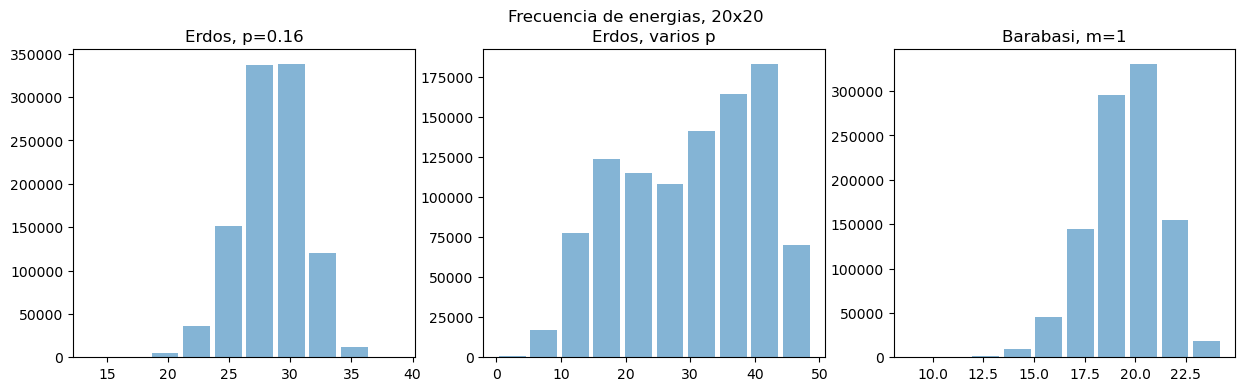

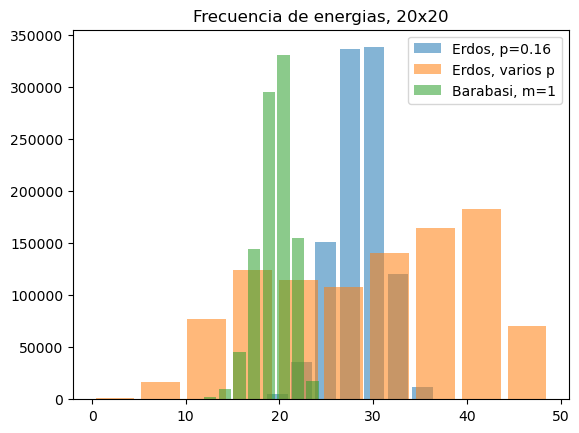

In [21]:
fig, ax = plt.subplots(1, len(labels), figsize = (15, 4))
for i in range(len(labels)):
    e = energias[i]
    l = labels[i]
    ax[i].hist(e, alpha= 0.55, rwidth = 0.85)
    ax[i].set_title(l)
    
plt.suptitle('Frecuencia de energias, 20x20')
plt.show()

for i in range(len(labels)):
    e = energias[i]
    l = labels[i]
    plt.hist(e, alpha= 0.55, rwidth = 0.85, label = l)
    
plt.title('Frecuencia de energias, 20x20')
plt.legend()
plt.show()

### Indice de Randic

In [22]:
randic_p = np.load('.\datos\datos_edros_N1000000_n20_p16_etiqueta_randic.npy')
randic_m = np.load('.\datos\datos_edros_N1000000_n20_multiple_p_etiqueta_randic.npy')
randic_b = np.load('.\datos\datos_barabasi_N1000000_n20_m1_etiqueta_randic.npy')

randic = [randic_p, randic_m, randic_b]
labels = ['Erdos, p=0.16', 'Erdos, varios p', 'Barabasi, m=1']

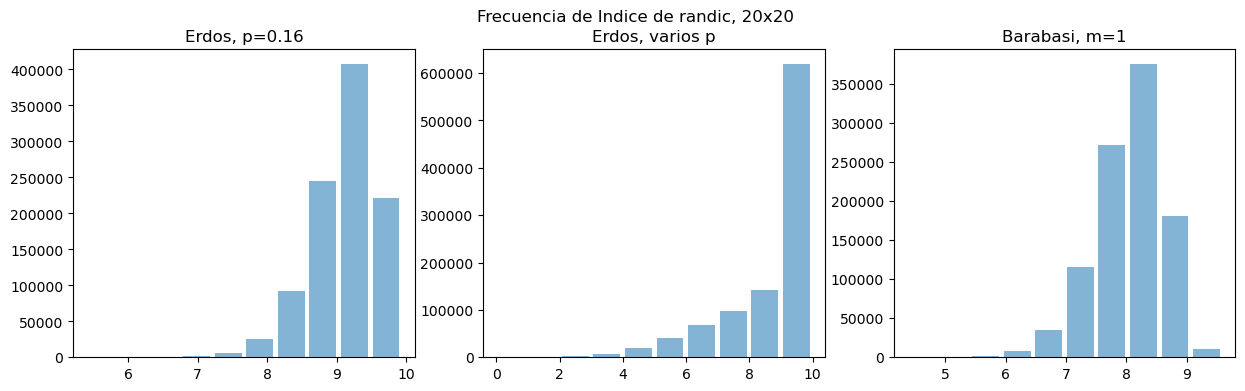

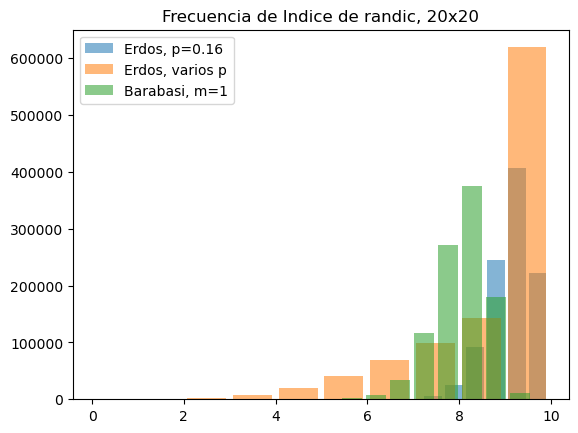

In [23]:
fig, ax = plt.subplots(1, len(labels), figsize = (15, 4))
for i in range(len(labels)):
    r = randic[i]
    l = labels[i]
    ax[i].hist(r, alpha= 0.55, rwidth = 0.85)
    ax[i].set_title(l)
    
plt.suptitle('Frecuencia de Indice de randic, 20x20')
plt.show()

for i in range(len(labels)):
    r = randic[i]
    l = labels[i]
    plt.hist(r, alpha= 0.55, rwidth = 0.85, label = l)
    
plt.title('Frecuencia de Indice de randic, 20x20')
plt.legend()
plt.show()

### Energia vs Indice de Randic

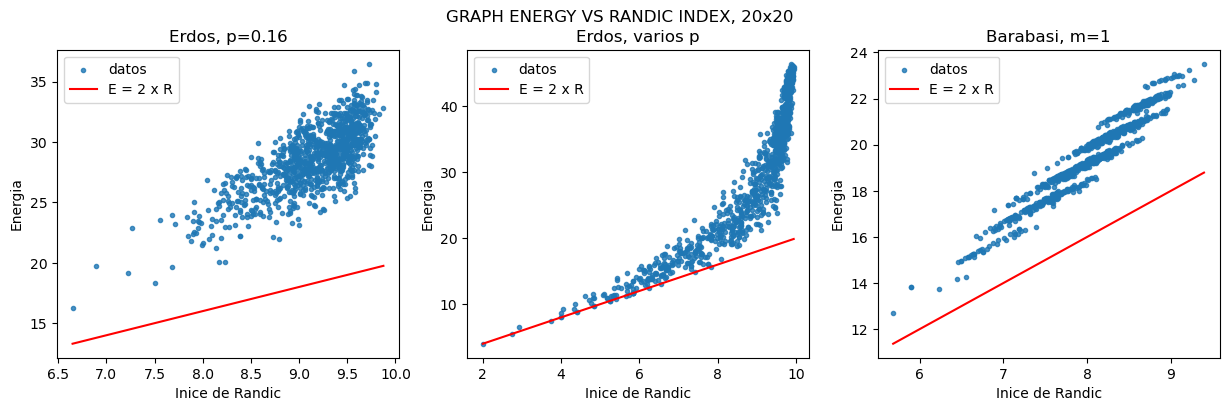

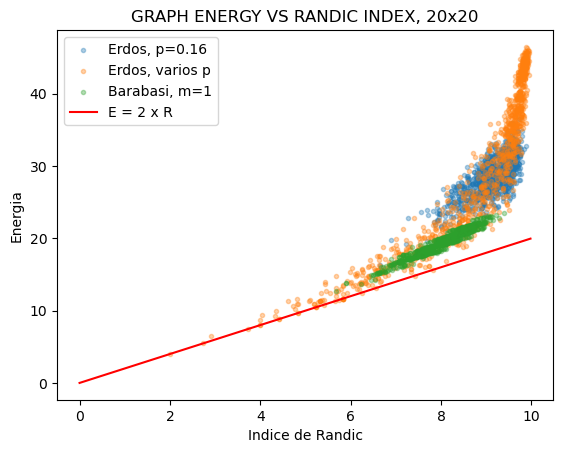

In [24]:
datos = 1000

fig, ax = plt.subplots(1, len(labels), figsize = (15, 4))
for i in range(len(labels)):
    r = randic[i][:datos]
    e = energias[i][:datos]
    l = labels[i]
    ax[i].scatter(r, e, alpha = 0.8, marker = '.', label = 'datos')
    x = np.linspace(min(r), max(r), 100)  # Rango de valores x basado en tus datos r
    y = [2*val for val in x]
    ax[i].plot(x, y, 'r-', label='E = 2 x R')  # 'r-' representa una línea roja continua
    ax[i].set_xlabel('Inice de Randic')
    ax[i].set_ylabel('Energia')
    ax[i].legend()
    ax[i].set_title(l)
    
plt.suptitle('GRAPH ENERGY VS RANDIC INDEX, 20x20')
plt.show()

flattened_randic = np.ndarray.flatten(np.array(randic))  # Aplanar el array randic
x = np.linspace(min(flattened_randic), max(flattened_randic), 100)
y = 2 * x
for i in range(len(labels)):
    r = randic[i][:datos]
    e = energias[i][:datos]
    l = labels[i]
    plt.scatter(r, e, alpha = 0.35, label = l, marker = '.')
plt.plot(x, y, 'r-', label='E = 2 x R')  # Línea y = 2x
plt.title('GRAPH ENERGY VS RANDIC INDEX, 20x20')
plt.xlabel('Indice de Randic')
plt.ylabel('Energia')
plt.legend()
plt.show()

### Conectividad

In [25]:
conectividad_p = np.load('.\datos\datos_edros_N1000000_n20_p16_etiqueta_conectividad.npy')
conectividad_m = np.load('.\datos\datos_edros_N1000000_n20_multiple_p_etiqueta_conectividad.npy')
conectividad_b = np.load('.\datos\datos_barabasi_N1000000_n20_m1_etiqueta_conectividad.npy')

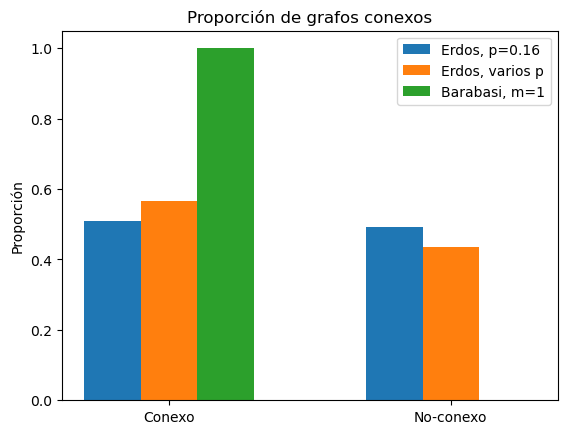

In [26]:
proporciones_p = np.mean(conectividad_p), 1 - np.mean(conectividad_p)
proporciones_m = np.mean(conectividad_m), 1 - np.mean(conectividad_m)
proporciones_b = np.mean(conectividad_b), 1 - np.mean(conectividad_b)

etiquetas = ['Conexo', 'No-conexo']
x = np.arange(len(etiquetas))
width = 0.2

fig, ax = plt.subplots()
# Crear las barras para las proporciones p, m y b
rects1 = ax.bar(x - width, proporciones_p, width, label='Erdos, p=0.16')
rects2 = ax.bar(x, proporciones_m, width, label='Erdos, varios p')
rects3 = ax.bar(x + width, proporciones_b, width, label='Barabasi, m=1')

ax.set_ylabel('Proporción')
ax.set_title('Proporción de grafos conexos')
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
ax.legend()
plt.show()

### Ver algunos grafos con sus etiquetas

In [27]:
grafos_p  =np.load('.\datos\datos_edros_N1000000_n20_p16.npy')
grafos_m = np.load('.\datos\datos_edros_N1000000_n20_multiple_p.npy')
grafos_b = np.load('.\datos\datos_barabasi_N1000000_n20_m1.npy')

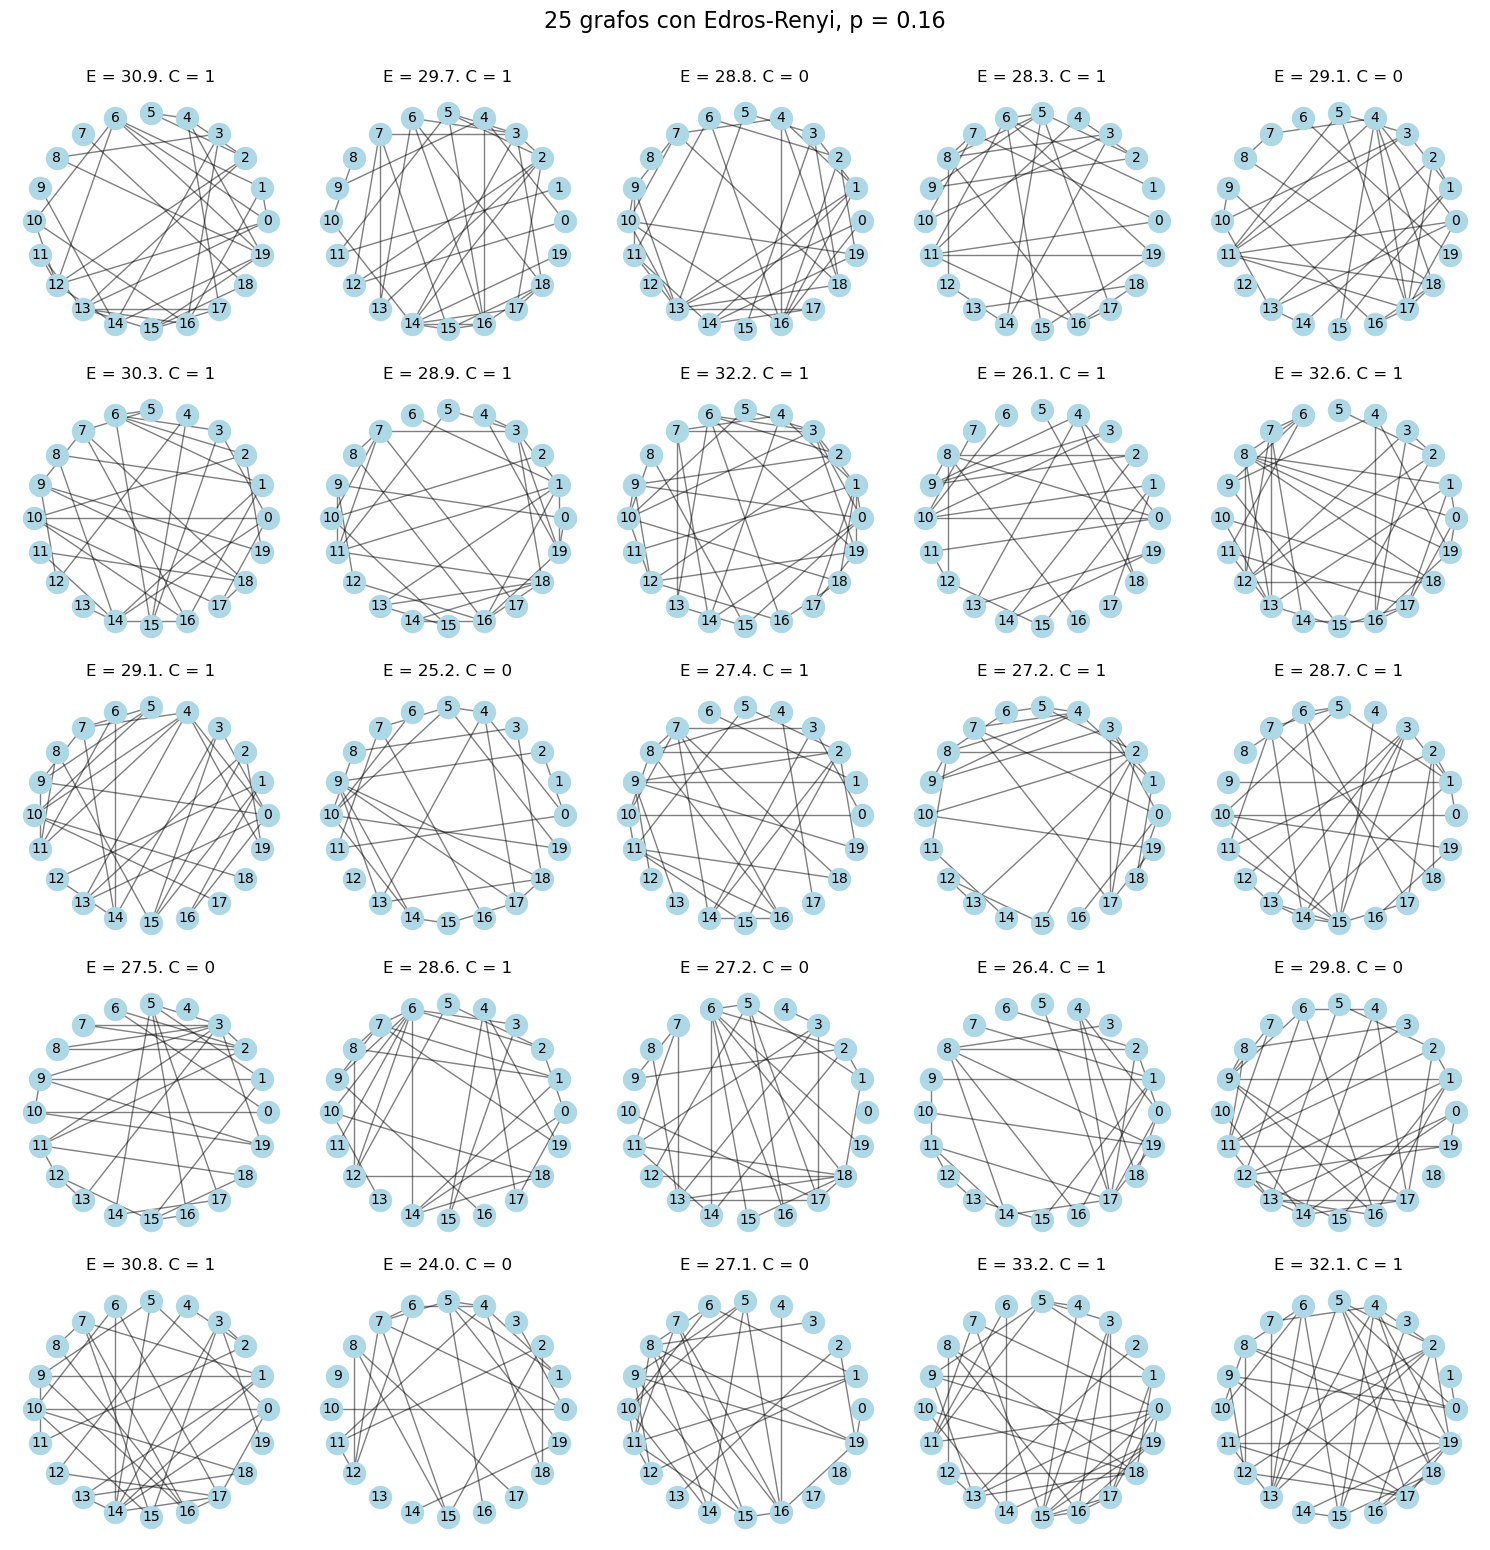

In [28]:
# Graficar 25 grafos de los generados con Edros p = 0.16
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, vector in enumerate(grafos_p[:25]):
    fila = i // 5
    columna = i % 5
    
    # obtener la energia y conectividad de este grafo
    energia = round(energia_p[i], 1) # redondear a un decimal
    conectividad = conectividad_p[i]
    
    titulo = 'E = ' + str(energia) + '. C = ' + str(conectividad)
    dibujar_grafo_circular_from_vector(vector, ax=axs[fila, columna], titulo = titulo)
plt.tight_layout()
fig.suptitle("25 grafos con Edros-Renyi, p = 0.16", fontsize=16, y=1.03)
plt.show()

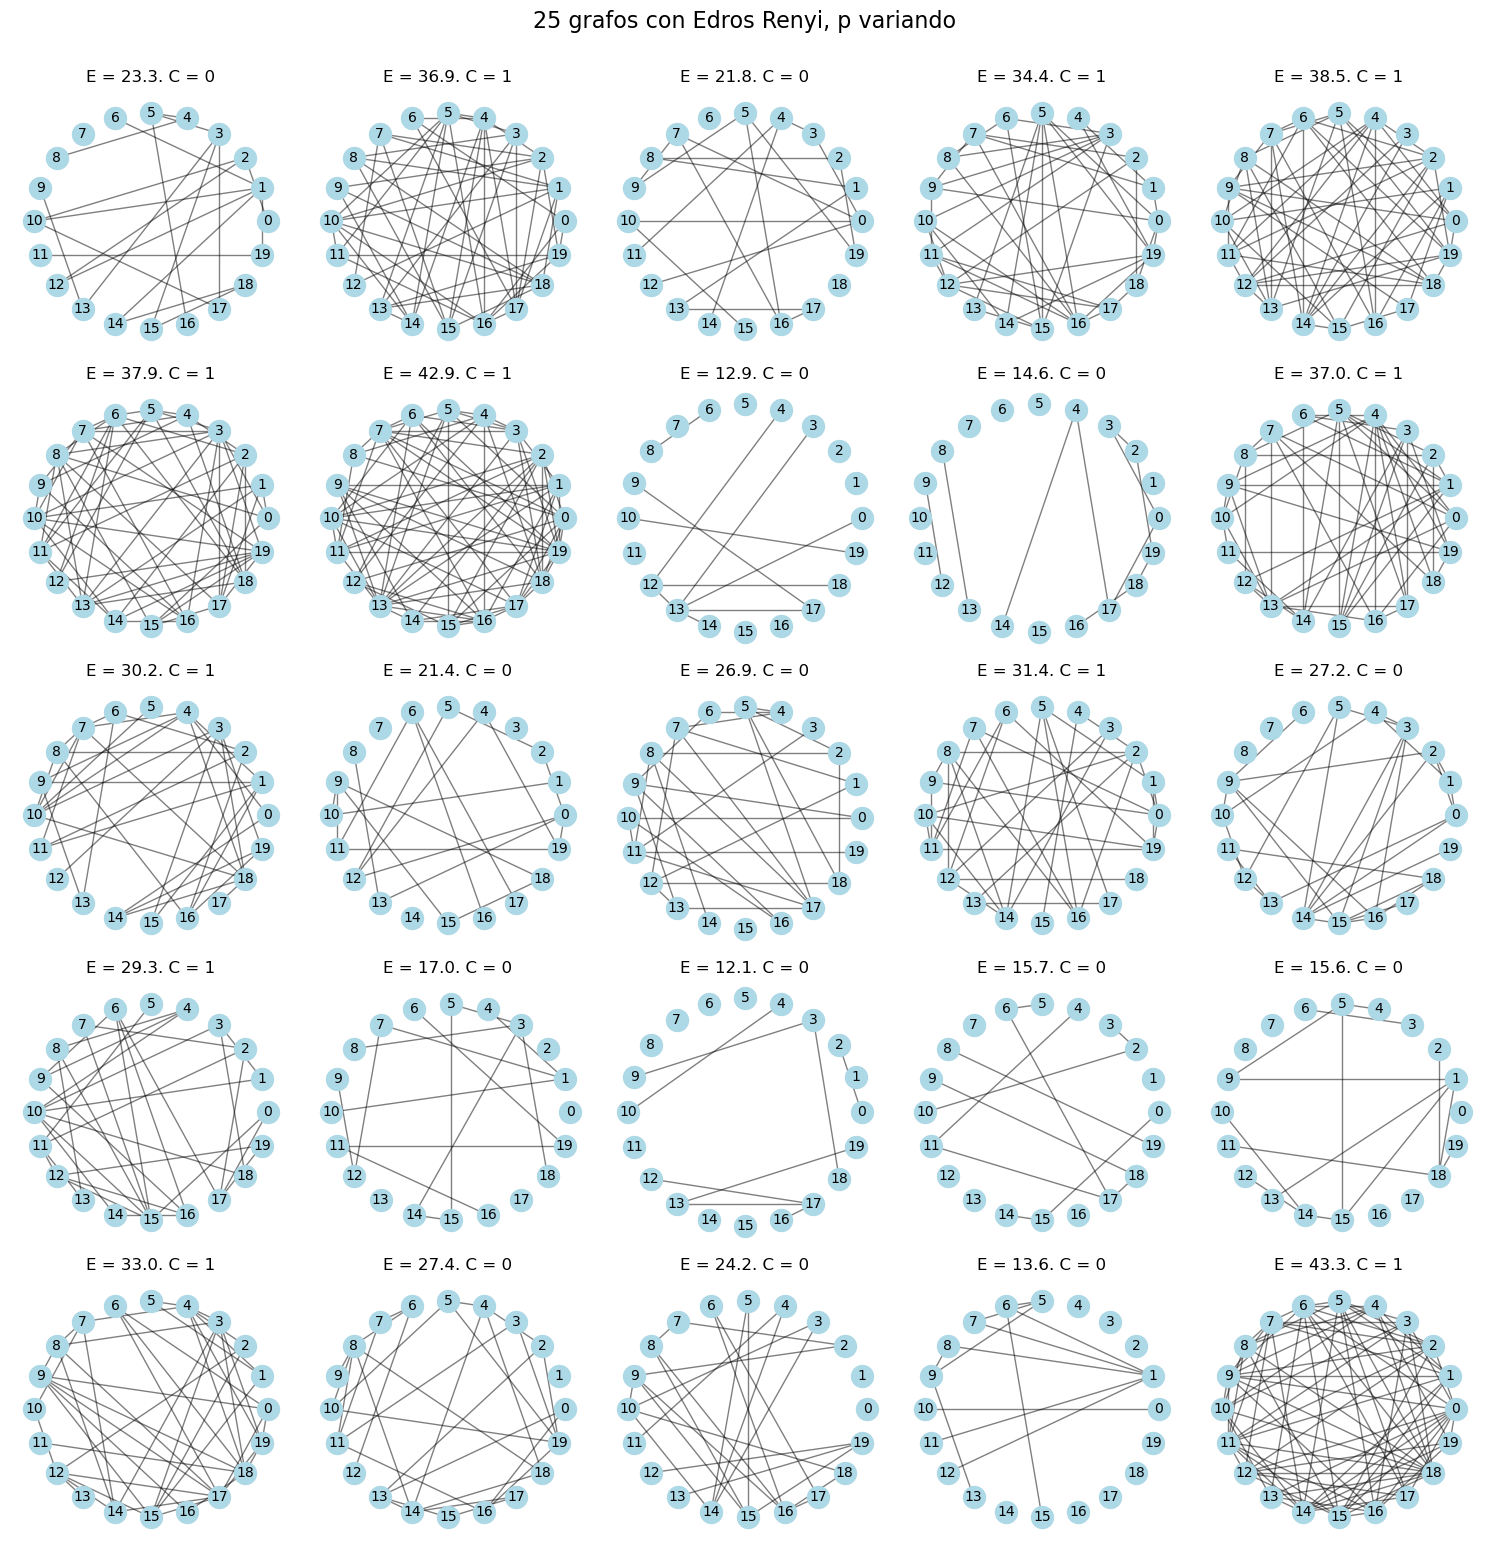

In [29]:
# Graficar 25 grafos de los generados con Edros y p variando
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i, vector in enumerate(grafos_m[:25]):
    fila = i // 5
    columna = i % 5
    # obtener la energia y conectividad de este grafo
    energia = round(energia_m[i], 1) # redondear a un decimal
    conectividad = conectividad_m[i]
    titulo = 'E = ' + str(energia) + '. C = ' + str(conectividad)
    dibujar_grafo_circular_from_vector(vector, ax=axs[fila, columna], titulo = titulo)
plt.tight_layout()
fig.suptitle("25 grafos con Edros Renyi, p variando", fontsize=16, y=1.03)
plt.show()

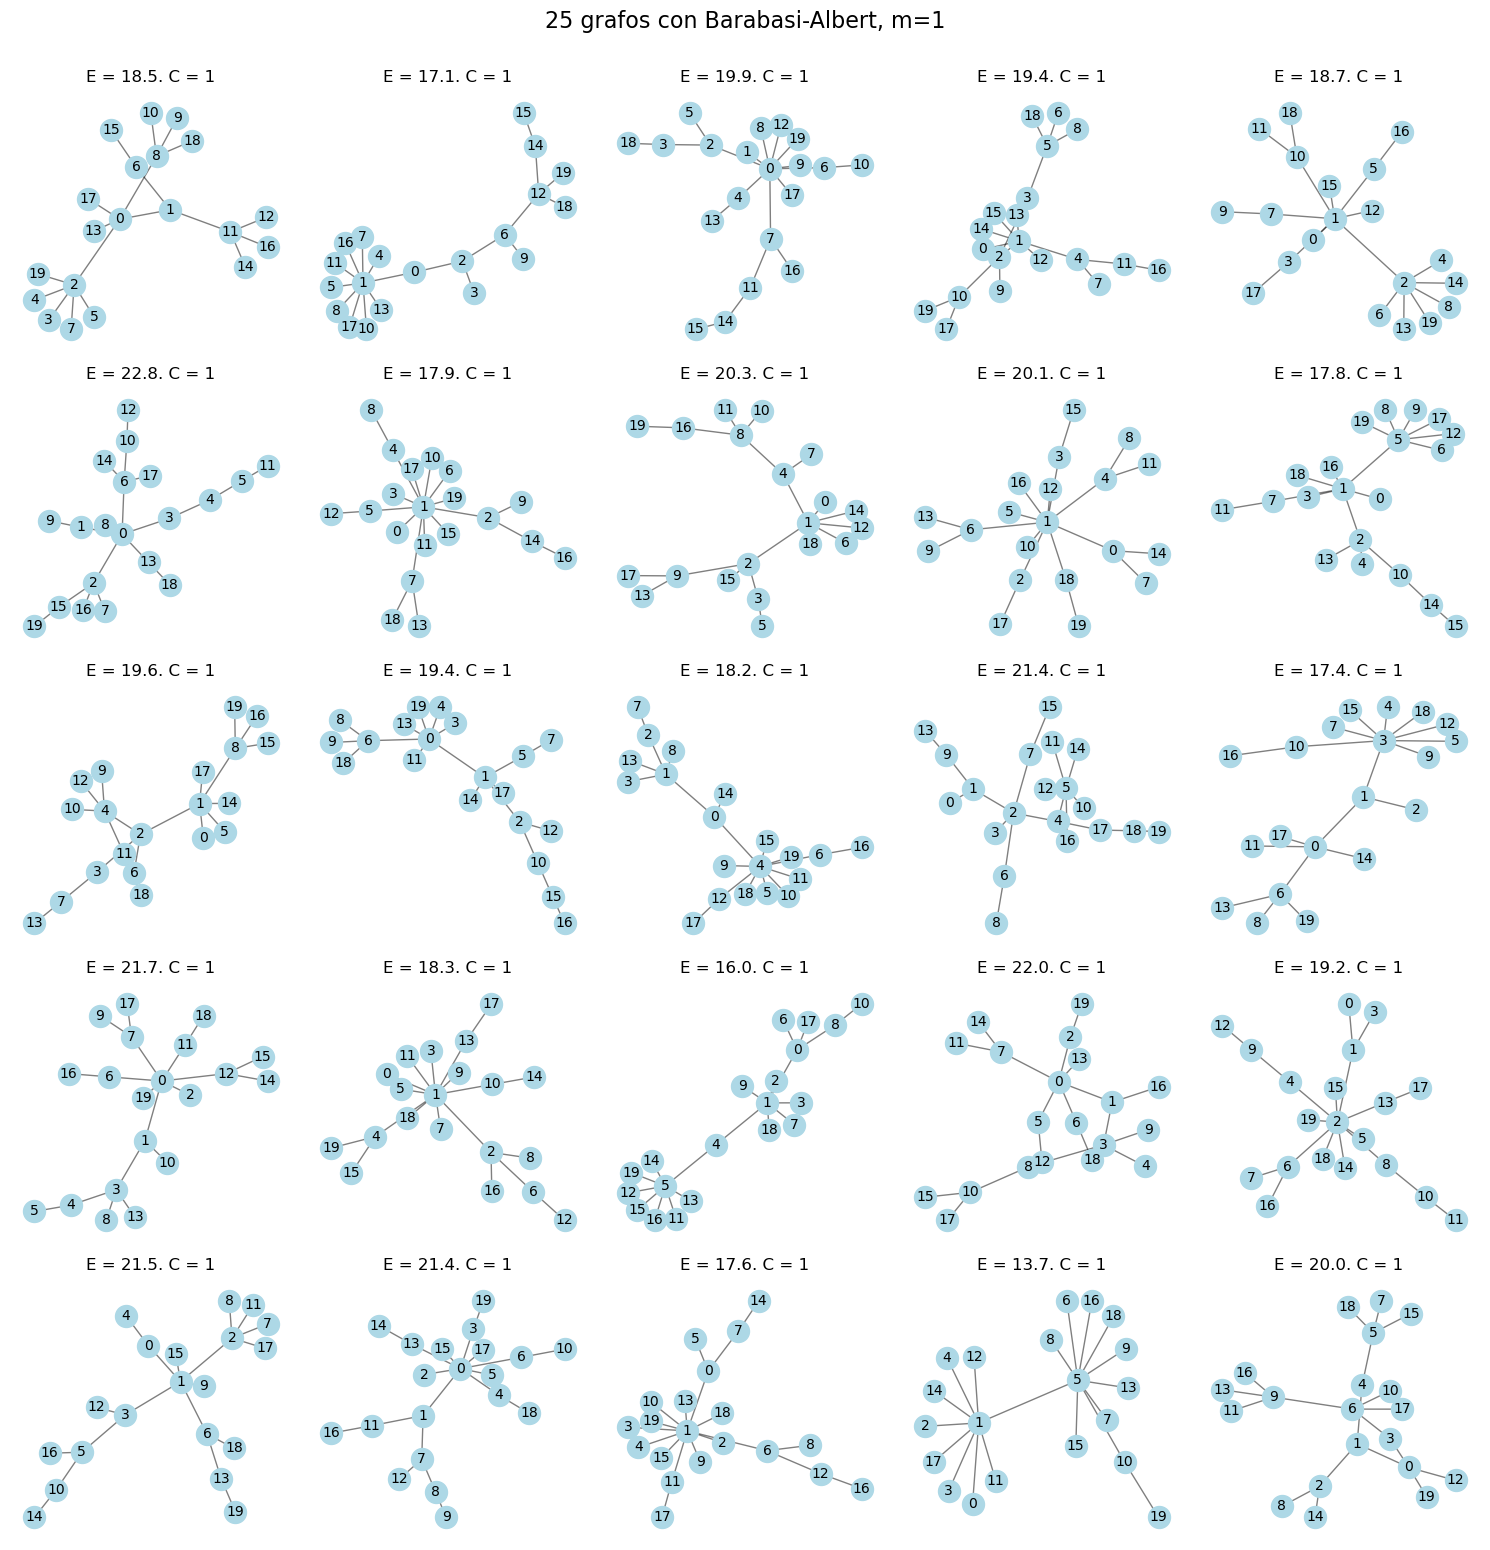

In [30]:
# Graficar 25 grafos de los generados con Barabasi m=1
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i, vector in enumerate(grafos_b[:25]):
    fila = i // 5
    columna = i % 5
    # obtener la energia y conectividad de este grafo
    energia = round(energia_b[i], 1) # redondear a un decimal
    conectividad = conectividad_b[i]
    titulo = 'E = ' + str(energia) + '. C = ' + str(conectividad)
    dibujar_grafo_from_vector(vector, ax=axs[fila, columna], titulo = titulo)
plt.tight_layout()
fig.suptitle("25 grafos con Barabasi-Albert, m=1", fontsize=16, y=1.03)
plt.show()